1.)Check eligibility of the Customer given the inputs described above.(Classification)

In [6]:
from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
import os
os.chdir("C:/Users/hp/Desktop/Python Classess/Deep Learning/Project_II_end_to_end")

In [8]:
import pandas as pd
A = pd.read_csv("training_set.csv")

In [9]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [10]:
from PM8wd import replacer
replacer(A)

In [11]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Define X and Y

In [12]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# EDA

# Divide data in con and cat¶

In [13]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
from PM8wd import ANOVA,chisq

for i in con:
    print("--------","Loan_Status vs",i,"-------")
    print(ANOVA(A,"Loan_Status",i))

-------- Loan_Status vs ApplicantIncome -------
0.90252
-------- Loan_Status vs CoapplicantIncome -------
0.14239
-------- Loan_Status vs LoanAmount -------
0.36769
-------- Loan_Status vs Loan_Amount_Term -------
0.60396
-------- Loan_Status vs Credit_History -------
0.0


In [15]:
for i in cat:
    print("--------","Loan_Status vs",i,"-------")
    print(chisq(A,"Loan_Status",i))

-------- Loan_Status vs Gender -------
0.73915
-------- Loan_Status vs Married -------
0.02961
-------- Loan_Status vs Dependents -------
0.36887
-------- Loan_Status vs Education -------
0.0431
-------- Loan_Status vs Self_Employed -------
1.0
-------- Loan_Status vs Property_Area -------
0.00214


# Outliers

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [17]:
#ss.fit(X[con])

In [18]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [19]:
X1.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.000000,0.279851,0.45164
1,0.000000,-0.038610,-0.219273,0.279851,0.45164
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164


In [20]:
from PM8wd import outliers
OL = outliers(X1)

In [21]:
#OL

In [22]:
X = X.drop(index=OL,axis=0)
Y = Y.drop(index=OL,axis=0)

In [23]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])

In [24]:
X.index

RangeIndex(start=0, stop=577, step=1)

In [25]:
Y.index

RangeIndex(start=0, stop=577, step=1)

# Preprocessing

In [26]:
from PM8wd import preprocessing
Xnew = preprocessing(X)

In [27]:
Xnew.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.398479,-0.860843,0.184585,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.248823,0.053073,-0.143355,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.562989,-0.860843,-1.247642,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.703717,0.568211,-0.285844,0.239408,0.456461,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1


In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [29]:
tr_acc

0.8134490238611713

In [30]:
ts_acc

0.8362068965517241

# Tree Model

In [31]:
X = X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]

In [32]:
Xnew = preprocessing(X)

In [33]:
Xnew.head(5)

,Credit_History,CoapplicantIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Education_Graduate,Education_Not Graduate,Married_No,Married_Yes
0,0.456461,-0.860843,0,0,1,1,0,1,0
1,0.456461,0.053073,1,0,0,1,0,0,1
2,0.456461,-0.860843,0,0,1,1,0,0,1
3,0.456461,0.568211,0,0,1,0,1,0,1
4,0.456461,-0.860843,0,0,1,1,0,1,0


In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [35]:
Xnew.shape

(577, 9)

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [37]:
tr_acc

0.813

In [38]:
ts_acc

0.836

# GridSearchCV

In [39]:
tuning_grid = {"max_depth":range(2,10,1),"criterion":["gini","entropy"]}

In [40]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [41]:
cvmodel.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [42]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=21)

In [43]:
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [44]:
tr_acc

0.813

In [45]:
ts_acc

0.836

In [46]:
tuning_grid = {"min_samples_split":range(2,10,1),"criterion":["gini","entropy"]}

In [47]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [48]:
cvmodel.best_params_

{'criterion': 'entropy', 'min_samples_split': 6}

In [49]:
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=6, random_state=21)

In [50]:
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [51]:
tr_acc

0.859

In [52]:
ts_acc

0.75

In [53]:
tuning_grid = {"min_samples_leaf":range(2,10,1),"criterion":["gini","entropy"]}

In [54]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=21)
cv = GridSearchCV(dtc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [55]:
cvmodel.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 8}

In [56]:
dtc = DecisionTreeClassifier(criterion='gini', min_samples_leaf=8, random_state=21)

In [57]:
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [58]:
tr_acc

0.82

In [59]:
ts_acc

0.802

In [60]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [61]:
tr_acc

0.813

In [62]:
ts_acc

0.845

# GridSearchCV

In [63]:
tuning_grid = {"max_depth":range(2,10,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [64]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [65]:
cvmodel.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}

In [66]:
rfc = RandomForestClassifier(criterion='gini', max_depth=2, n_estimators= 20,random_state=21)

In [67]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [68]:
tr_acc

0.811

In [69]:
ts_acc

0.845

In [70]:
tuning_grid = {"min_samples_split":range(2,10,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [71]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [72]:
cvmodel.best_params_

{'criterion': 'gini', 'min_samples_split': 8, 'n_estimators': 29}

In [73]:
rfc = RandomForestClassifier(criterion='gini', min_samples_split=8, n_estimators= 29,random_state=21)

In [74]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [75]:
tr_acc

0.846

In [76]:
ts_acc

0.828

In [77]:
tuning_grid = {"min_samples_leaf":range(2,10,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [78]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)

In [79]:
cvmodel.best_params_

{'criterion': 'gini', 'min_samples_leaf': 7, 'n_estimators': 20}

In [80]:
rfc = RandomForestClassifier(criterion='gini', min_samples_split=7, n_estimators= 20,random_state=21)

In [81]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),3)
ts_acc = round(accuracy_score(ytest,pred_ts),3)

In [82]:
tr_acc

0.863

In [83]:
ts_acc

0.81

# Getting Test Set Data for prediction

In [84]:
B = pd.read_csv("testing_set.csv")

In [85]:
X.columns 

Index(['Credit_History', 'CoapplicantIncome', 'Property_Area', 'Education',
       'Married'],
      dtype='object')

In [86]:
B1 = B[X.columns].head()

In [87]:
B1.head()

,Credit_History,CoapplicantIncome,Property_Area,Education,Married
0,1.0,0,Urban,Graduate,Yes
1,1.0,1500,Urban,Graduate,Yes
2,1.0,1800,Urban,Graduate,Yes
3,NaN,2546,Urban,Graduate,Yes
4,1.0,0,Urban,Not Graduate,No


# Missing Data Treatment

In [88]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [89]:
replacer(B)

In [90]:
#B.isna().sum()

In [91]:
cat = []
con = []
for i in B.columns:
    if(B[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [92]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [93]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [94]:
B1 = pd.DataFrame(ss.transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [95]:
#Bnew.head()

In [96]:
ready_for_pred = Bnew[Xnew.columns]

In [97]:
predicted_final = model.predict(ready_for_pred)

In [98]:
predicted_final

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [99]:
E = pd.DataFrame([B.Loan_ID,predicted_final]).T
E.columns = ["Loan_ID","Loan_Status"]

In [100]:
E.to_csv("submission.csv")

In [101]:
E.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


# If customer is not eligible for the input required amount and duration:

a.)what can be amount for the given duration.(Regression)

In [102]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [103]:
B['Loan_Status']=predicted_final

In [104]:
B.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Find out people for whom loan was rejected(testing set)

In [110]:
xtest = B[B.Loan_Status == "N"]
xtest_1 = xtest.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)


In [111]:
xtest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,N
10,LP001078,Male,No,0,Not Graduate,No,3091,0,90.0,360.0,1.0,Urban,N
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.0,Semiurban,N
21,LP001124,Female,No,3+,Not Graduate,No,2083,0,28.0,180.0,1.0,Urban,N


In [112]:
xtest_1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
4,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban
7,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural


In [113]:
xtest_1.index = range(0,xtest_1.shape[0])

In [114]:
xtest_1.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban
1,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural


# Create training data based on above predictors

In [119]:
Q = A[xtest_1.columns]
Q

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.00000,0.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106.00000,0.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.00000,240.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583.00000,0.0,360.0,1.0,Urban


In [121]:
Q['LS'] = A.Loan_Status
Q

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LS
0,Male,No,0,Graduate,No,5849.00000,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.00000,0.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.00000,0.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.00000,240.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583.00000,0.0,360.0,1.0,Urban,Y


In [122]:
Q = Q[Q.LS == "Y"]
Q

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LS
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232.0,1950.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900.0,0.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106.0,0.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072.0,240.0,360.0,1.0,Urban,Y


In [123]:
Q = Q.drop(labels=["LS"],axis=1)
Q

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232.0,1950.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900.0,0.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106.0,0.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,360.0,1.0,Urban


In [124]:
R = A[["LoanAmount"]]
R

,LoanAmount
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000
...,...
609,71.000000
610,40.000000
611,253.000000
612,187.000000


In [125]:
R = R.iloc[Q.index,:]
R

,LoanAmount
0,146.412162
2,66.000000
3,120.000000
4,141.000000
5,267.000000
...,...
608,108.000000
609,71.000000
610,40.000000
611,253.000000


In [126]:
R.index = range(0,R.shape[0])

In [127]:
R

,LoanAmount
0,146.412162
1,66.000000
2,120.000000
3,141.000000
4,267.000000
...,...
417,108.000000
418,71.000000
419,40.000000
420,253.000000


In [128]:
Q.shape[0]

422

In [129]:
Q.index = range(0,Q.shape[0])

# Preprocessing

In [130]:
Q.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban
3,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,360.0,1.0,Urban


In [131]:
from PM8wd import preprocessing
xtrain = preprocessing(Q)
xtest_final = preprocessing(xtest_1)

In [132]:
xtest_final.shape

(102, 19)

In [133]:
xtest_final.head(3)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.318279,-0.624147,0.202396,1.209912,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
1,-0.055287,-0.624147,0.202396,-0.851309,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
2,-0.398698,-0.624147,0.202396,1.209912,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [134]:
ytrain = R.LoanAmount

In [135]:
ytrain.head()

0    146.412162
1     66.000000
2    120.000000
3    141.000000
4    267.000000
Name: LoanAmount, dtype: float64

# Linear Regression model

In [136]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest_final)

In [137]:
pred.shape

(102,)

In [138]:
act = B[B.Loan_Status == "N"][["LoanAmount"]]

In [139]:
act

,LoanAmount
4,78.0
7,147.0
10,90.0
13,166.0
21,28.0
...,...
347,70.0
351,106.0
354,158.0
364,126.0


In [141]:
act.index = range(0,102)
act

,LoanAmount
0,78.0
1,147.0
2,90.0
3,166.0
4,28.0
...,...
97,70.0
98,106.0
99,158.0
100,126.0


In [142]:
E = range(0,102)

In [143]:
E

range(0, 102)

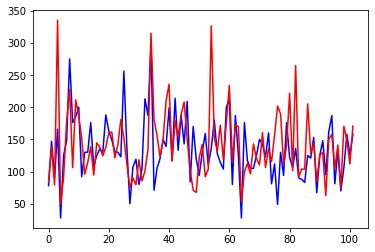

In [144]:
import matplotlib.pyplot as plt
plt.plot(act,c="blue")
plt.plot(pred,c="red")

In [145]:
pred

array([ 83.33100697, 138.19971453,  79.11592716, 335.07343653,
        49.31732017,  91.41572754, 177.27162775, 227.21699445,
       106.07958187, 211.33339682, 187.54590697, 151.95238323,
        95.82402067, 114.0043666 , 138.74886881,  94.55721747,
       144.67487176, 138.02557267, 124.31161155, 137.69133423,
       160.34368736, 161.30868865, 121.39795418, 141.57897068,
       181.07305503, 151.84317015, 111.60012366,  75.44958078,
        90.14865657,  79.50650407, 118.2310043 ,  85.36702185,
       101.04443277, 134.55683914, 314.9133577 , 181.26482746,
       156.0941141 , 122.63933821, 148.94350803, 209.75962574,
       235.80824666, 116.30905804, 178.94454983, 153.42345985,
       188.73602838, 208.15707696, 150.32222848, 101.84171785,
        71.10367522,  67.61729748, 121.44397357, 142.31853007,
        92.08402401, 103.57694782, 326.36158513, 152.51729458,
       131.83985172, 172.11054071, 118.41873245, 176.35365288,
       233.92931251, 115.38388588, 172.42203813, 169.99

In [146]:
F = pd.DataFrame([pred]).T
F.columns = ["Loan_Amount"]

In [147]:
F

,Loan_Amount
0,83.331007
1,138.199715
2,79.115927
3,335.073437
4,49.317320
...,...
97,74.035047
98,170.355060
99,149.345185
100,111.732070


# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? 
What is that duration?(Regression)¶

In [148]:
B['Duration']=B.Loan_Amount_Term/12

In [149]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Duration
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y,30.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y,30.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y,30.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y,30.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,N,30.0


In [150]:
data_for_pred = B[(B.Duration<=20)&(B.Loan_Status=="Y")]
data_for_pred

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Duration
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.000000,Urban,Y,20.0
12,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,0.825444,Urban,Y,15.0
19,LP001115,Male,No,0,Graduate,No,1300,3470,100.0,180.0,1.000000,Semiurban,Y,15.0
29,LP001176,Male,No,0,Graduate,No,2942,2382,125.0,180.0,1.000000,Urban,Y,15.0
53,LP001298,Male,Yes,2,Graduate,No,4116,1000,30.0,180.0,1.000000,Urban,Y,15.0
57,LP001321,Male,Yes,2,Graduate,No,3613,3539,134.0,180.0,1.000000,Semiurban,Y,15.0
59,LP001324,Male,Yes,3+,Graduate,No,4720,0,90.0,180.0,1.000000,Semiurban,Y,15.0
72,LP001375,Male,Yes,1,Graduate,No,4083,1775,139.0,60.0,1.000000,Urban,Y,5.0
85,LP001452,Male,Yes,2,Graduate,No,4635,8000,102.0,180.0,1.000000,Rural,Y,15.0
128,LP001667,Male,No,0,Graduate,No,3073,0,70.0,180.0,1.000000,Urban,Y,15.0


In [152]:
data_for_pred_final = data_for_pred.drop(labels=['Duration','Loan_ID','Loan_Status',"Loan_Amount_Term"],axis=1)
data_for_pred_final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
8,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
12,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban
19,Male,No,0,Graduate,No,1300,3470,100.0,1.000000,Semiurban
29,Male,No,0,Graduate,No,2942,2382,125.0,1.000000,Urban
53,Male,Yes,2,Graduate,No,4116,1000,30.0,1.000000,Urban
57,Male,Yes,2,Graduate,No,3613,3539,134.0,1.000000,Semiurban
59,Male,Yes,3+,Graduate,No,4720,0,90.0,1.000000,Semiurban
72,Male,Yes,1,Graduate,No,4083,1775,139.0,1.000000,Urban
85,Male,Yes,2,Graduate,No,4635,8000,102.0,1.000000,Rural
128,Male,No,0,Graduate,No,3073,0,70.0,1.000000,Urban


In [153]:
data_for_pred_final.index = range(0,data_for_pred_final.shape[0])

In [154]:
data_for_pred_final.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban
2,Male,No,0,Graduate,No,1300,3470,100.0,1.000000,Semiurban
3,Male,No,0,Graduate,No,2942,2382,125.0,1.000000,Urban
4,Male,Yes,2,Graduate,No,4116,1000,30.0,1.000000,Urban
5,Male,Yes,2,Graduate,No,3613,3539,134.0,1.000000,Semiurban
6,Male,Yes,3+,Graduate,No,4720,0,90.0,1.000000,Semiurban
7,Male,Yes,1,Graduate,No,4083,1775,139.0,1.000000,Urban
8,Male,Yes,2,Graduate,No,4635,8000,102.0,1.000000,Rural
9,Male,No,0,Graduate,No,3073,0,70.0,1.000000,Urban


# Prepare Training Data

In [155]:
T = A[A.Loan_Status == "Y"]


In [156]:
T.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [161]:
T1 = T[data_for_pred_final.columns]
T1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,1.0,Urban
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232.0,1950.0,108.000000,1.0,Rural
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.000000,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,1.0,Urban


In [162]:
T1.index = range(0,T1.shape[0])

In [163]:
xtrain = preprocessing(T1)

In [164]:
xtrain

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.080550,-0.782349,0.024478,0.227742,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.414191,-0.782349,-0.929843,0.227742,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
2,-0.486605,0.444235,-0.288978,0.227742,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
3,0.106772,-0.782349,-0.039753,0.227742,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
4,0.005531,1.400326,1.455599,0.227742,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,-0.373903,0.232002,-0.431393,0.227742,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
418,-0.431557,-0.782349,-0.870504,0.227742,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
419,-0.222130,-0.782349,-1.238408,0.227742,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
420,0.466583,-0.657506,1.289449,0.227742,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [165]:
ytrain = T[["Loan_Amount_Term"]]

In [166]:
ytrain.head()

,Loan_Amount_Term
0,360.0
2,360.0
3,360.0
4,360.0
5,360.0


In [167]:
ytrain.index = range(0,ytrain.shape[0])

In [278]:
#ytrain.head()

In [168]:
replacer(data_for_pred_final)
final_pred = preprocessing(data_for_pred_final)

In [169]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(final_pred)

In [284]:
#pred/12

In [170]:
U = B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U

,Loan_Amount_Term
8,240.0
12,180.0
19,180.0
29,180.0
53,180.0
57,180.0
59,180.0
72,60.0
85,180.0
128,180.0


In [172]:
U.index = range(0,U.shape[0])
U

,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,60.0
8,180.0
9,180.0


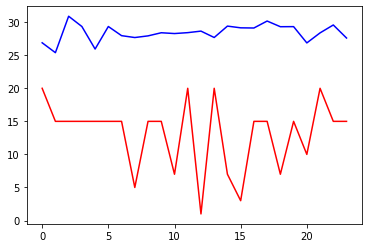

In [173]:
plt.plot(U/12,c="red")
plt.plot(pred/12,c="blue")

In [174]:
U.shape

(24, 1)

In [175]:
pred.shape

(24, 1)

In [176]:
U

,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,60.0
8,180.0
9,180.0
